# MDS Survey EDA

In [1]:
suppressWarnings(library(tidyverse))

# load data
suppressMessages(df <- read_csv('data/survey_results.csv'))

lu <- tibble(id = seq(0, 6, 1), question = colnames(df)) %>%
  mutate(id = paste0("Q", id))

new_cols <- lu$id

df <- df %>%
  rename_at(vars(colnames(df)), ~new_cols) %>%
  rename("Timestamp" = "Q0")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0       ✔ purrr   0.3.0  
✔ tibble  2.0.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.2       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


##  Glance at the data

In this milestone, we collected 53 responses from MDS students and TAs. Each observation contains 7 attributes including Timestamp and 6 questions that were asked in the survey. The description of each question is shown in the lookup table below.

In [12]:
dim(df)

[1] 53  7

In [2]:
df %>% head()

Timestamp,Q1,Q2,Q3,Q4,Q5,Q6
4/3/2019 13:12:59,1 - 3 years,Engineering,Bachelor's Degree,Less than 1 year,3 - 5 years,4 (enjoy)
4/3/2019 13:24:18,3 - 5 years,Business,Bachelor's Degree,1 - 3 years,1 - 3 years,4 (enjoy)
4/3/2019 13:31:59,1 - 3 years,Science,Bachelor's Degree,1 - 3 years,1 - 3 years,4 (enjoy)
4/3/2019 13:33:14,Less than 1 year,Business,Bachelor's Degree,Less than 1 year,Less than 1 year,4 (enjoy)
4/3/2019 14:21:02,Less than 1 year,Engineering,Master's Degree,Less than 1 year,1 - 3 years,3 (ok)
4/3/2019 14:56:38,3 - 5 years,Engineering,Bachelor's Degree,1 - 3 years,Less than 1 year,5 (enthusiastic)


#### Lookup table for Q1 -> Q6

In [17]:
(lu <- filter(lu, id != "Q0")) # remove timestamp

id,question
Q1,How many years of full-time work experience did you have prior to starting the program?
Q2,What is your field of study?
Q3,What was your level of education prior to starting the program?
Q4,How many years of full-time work experience did you have that are applicable to the program?
Q5,How many years of coding experience did you have prior to starting the program?
Q6,What is your self-rated enjoyment of the MDS program?


#### Summary table for each question

In [57]:
(df %>% group_by(Q1) %>% summarise(count = n(), percentage = n()/nrow(df)) %>% t())
(df %>% group_by(Q2) %>% summarise(count = n(), percentage = n()/nrow(df)) %>% t())
(df %>% group_by(Q3) %>% summarise(count = n(), percentage = n()/nrow(df)) %>% t())
(df %>% group_by(Q4) %>% summarise(count = n(), percentage = n()/nrow(df)) %>% t())
(df %>% group_by(Q5) %>% summarise(count = n(), percentage = n()/nrow(df)) %>% t())
(df %>% group_by(Q6) %>% summarise(count = n(), percentage = n()/nrow(df)) %>% t())

Q1,1 - 3 years,3 - 5 years,Less than 1 year,More than 5 years
count,16,12,14,11
percentage,0.3018868,0.2264151,0.2641509,0.2075472


Q2,Arts,Business,Engineering,Other,Science
count,2,9,13,8,21
percentage,0.03773585,0.16981132,0.24528302,0.15094340,0.39622642


Q3,Bachelor's Degree,Master's Degree
count,45,8
percentage,0.8490566,0.1509434


Q4,1 - 3 years,3 - 5 years,Less than 1 year,More than 5 years
count,16,6,27,4
percentage,0.3018868,0.1132075,0.5094340,0.0754717


Q5,1 - 3 years,3 - 5 years,Less than 1 year,More than 5 years
count,17,11,22,3
percentage,0.32075472,0.20754717,0.41509434,0.05660377


Q6,1 (very disappointed),3 (ok),4 (enjoy),5 (enthusiastic)
count,4,11,24,14
percentage,0.0754717,0.2075472,0.4528302,0.2641509


#### Reorder categorical variables

In [44]:
df_fact <- df %>%
  select(-Timestamp) %>%
  mutate_all(as_factor)

# relevel factors ...
df_fact$Q1 <- df_fact$Q1 %>%
  fct_relevel("Less than 1 year", "1 -  3 years", "3 - 5 years", "More than 5 years")

df_fact$Q3 <- df_fact$Q3 %>%
  fct_expand("PhD")

df_fact$Q5 <- df_fact$Q5 %>%
  fct_relevel("Less than 1 year", "1 - 3 years", "3 - 5 years", "More than 5 years")

df_fact$Q6 <- df_fact$Q6 %>%
  fct_expand("2 (disappointed)") %>%
  fct_relevel("1 (very disappointed)", "2 (disappointed)","3 (ok)", "4 (enjoy)", "5 (enthusiastic)")

## Plot count data

In [45]:
options(repr.plot.width = 8, repr.plot.height = 6)

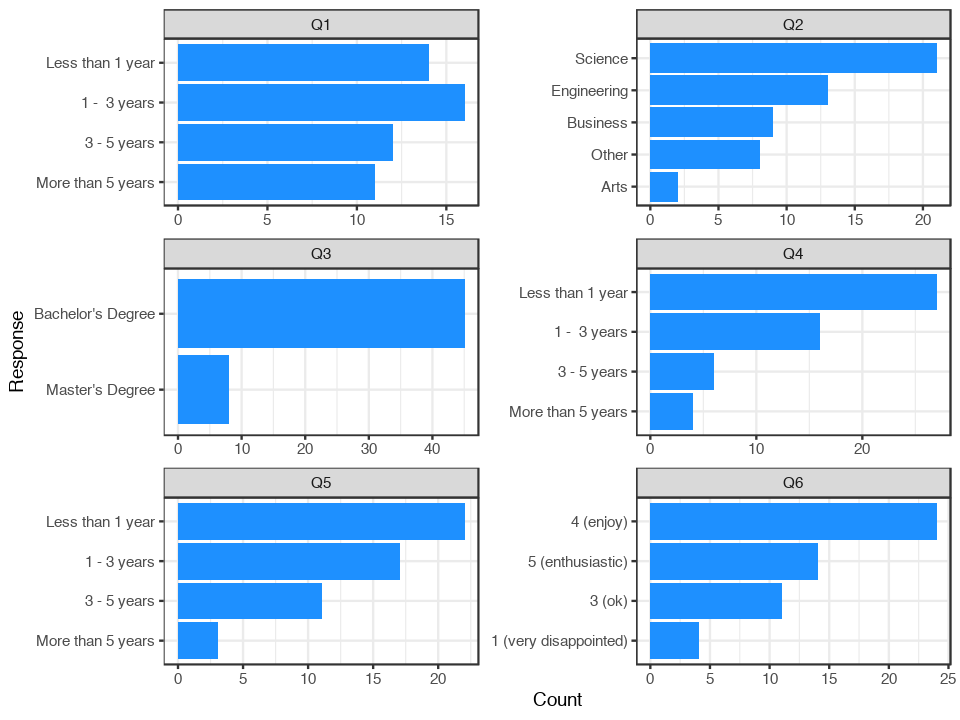

In [46]:
suppressWarnings(df_fact_sum <- df_fact %>%
  gather(key = "question", value = "answer") %>%
  group_by(question, answer) %>%
  summarise(freq = n()) %>%
  ungroup() %>%
  mutate(answer = factor(answer)))

ggplot(df_fact_sum, aes(reorder(answer, freq), y = freq)) +
  geom_bar(stat = "identity", fill = "dodgerblue") +
  facet_wrap(~question, scales = "free", ncol = 2) +
  coord_flip() +
  labs(x= "Response", y = "Count") + 
  theme_bw()


From these plots, we cannot say there is an obvious relationship between the number of years of full-time work experience a person has and their self-rated enjoyment of the MDS program. We need to take a deeper look at the data.

## Plot heatmaps of variables showing how they influence the response variable

#### First, create function to plot heatmaps

In [78]:
plot_heat <- function(df, x, y, fill=freq){
  
  group_var1 <- enquo(x)
  group_var2 <- enquo(y)
  fill_var <- enquo(fill)
    
  tbl <- df_fact %>%
    group_by(!!group_var1, !!group_var2) %>%
    summarise(freq = n())
  
  p <- ggplot(tbl, aes_string(x = group_var1, y = group_var2, fill = fill_var)) +
    geom_tile()+
    scale_y_discrete(drop = FALSE) +
    scale_x_discrete(drop = FALSE) +
    scale_fill_gradient(low = "#ffeda0", high = "#f03b20") +
    labs(y = "", x = "", fill = "") +
    theme_bw()

  p
}

In [81]:
options(repr.plot.width = 6, repr.plot.height = 4)

#### Number of years of prior full-time work experience vs. self-rated enjoyment of MDS program

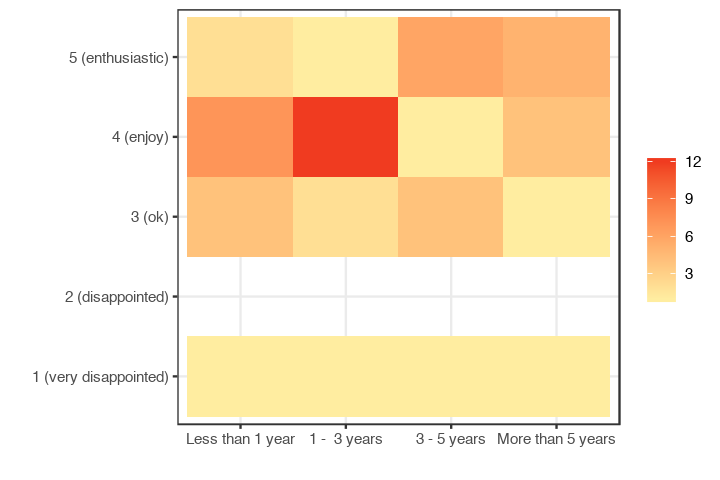

In [82]:
plot_heat(df_fact, x = Q1, y = Q6)

From this heatmap, we can see that for the people who have work expriences no more 3 years, 4(enjoy) is the level they chose most. For the people who have 3-5 years work expriences, although 5(enthusiastic) is the level they chose most, there are also a great amout of people chose 3(ok). For people who have more than 5 years work expriences, they tend to chose eith 5(enthusiastic) or 4(enjoy). 

#### Field of study vs. enjoyment of MDS program

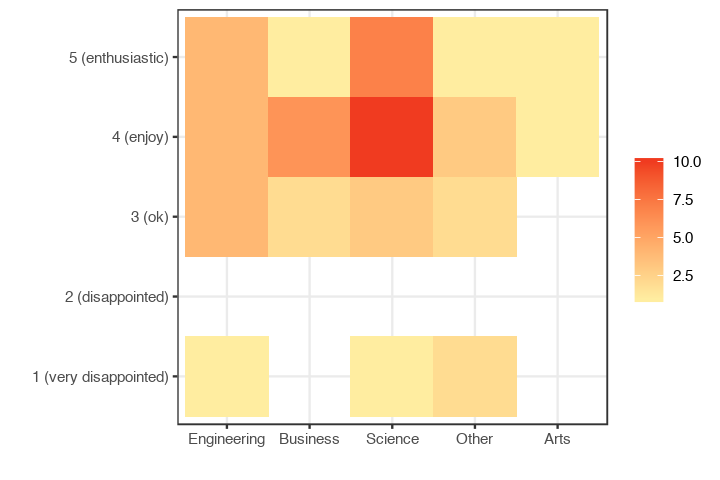

In [83]:
plot_heat(df_fact, x = Q2, y = Q6)

People studied science and arts have rated the program highly by either chose 5(enthusiastic) or 4(enjoy) most. People studied business tend to choose 4(enjoy) most. For people studied Engineering and other tend to have more diverse responses.

#### Level of education vs. enjoyment of MDS program

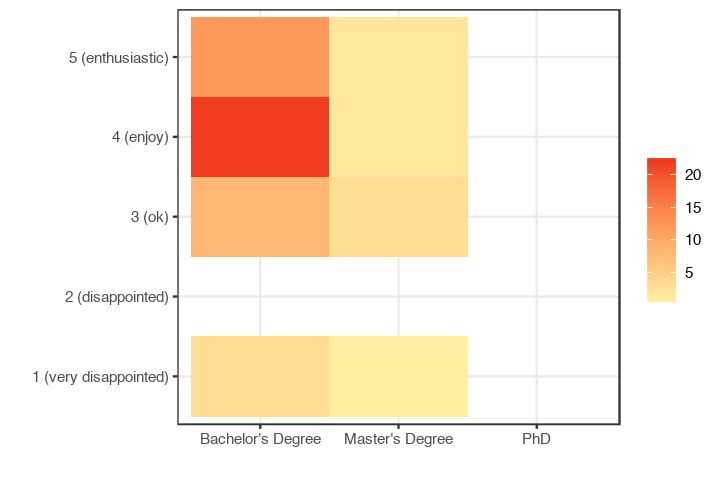

In [84]:
plot_heat(df_fact, x = Q3, y = Q6)

People who had a Bachelor's Degree tend to chose 4(enjoy) most, whereas people with a Master's Degree responded variously.

#### Number of years of relevant prior full-time work experience vs. enjoyment of MDS program

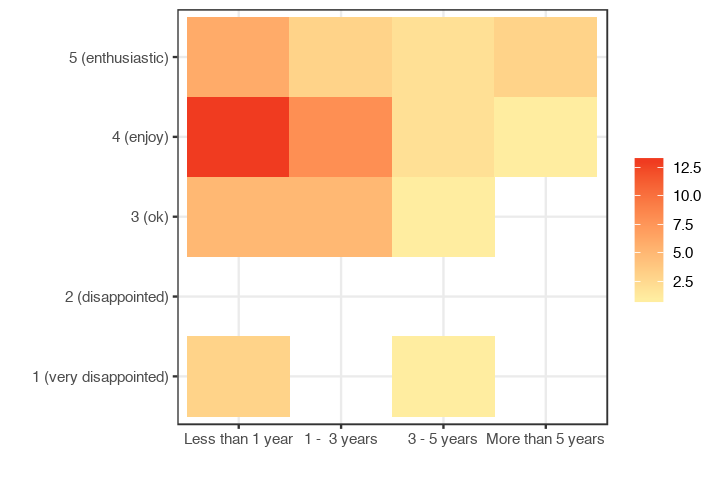

In [85]:
plot_heat(df_fact, x = Q4, y = Q6)

People who had fewer that 5 years of full-time work experiences that are applicable to the program tend to response 4(enjoy) most, and people who had more that 5 years of full-time work experiences that are applicable to the program tend to response 5(enthusiastic) most.

#### Number of years of  coding experience vs. enjoyment of MDS program

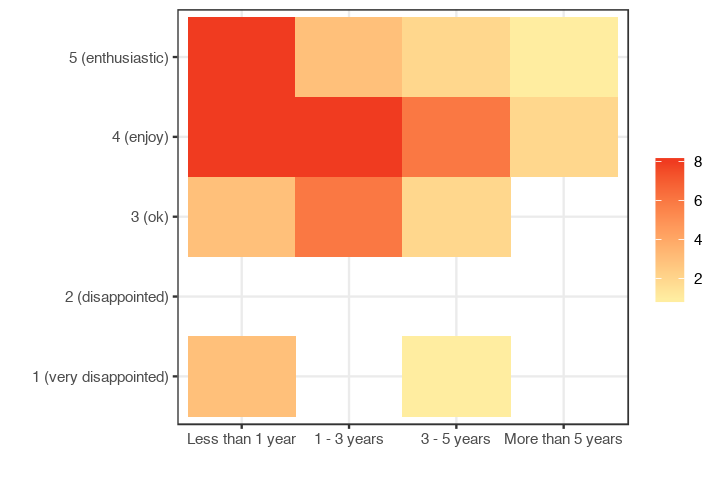

In [86]:
plot_heat(df_fact, x = Q5, y = Q6)

In general, people with fewer than 3 years of coding expriences tend to choose 5(enthusiastic) or 4(enjoy). However, there are also a decent amount of people with less than 1 year coding expriences rate this program as 1(very disappointed). People with more than 3 years of coding expriences tend to choose 4(enjoy).

## Plot heatmaps of confounding variables showing how they influence the independent variable

#### Field of study vs. number of years of full time work experience

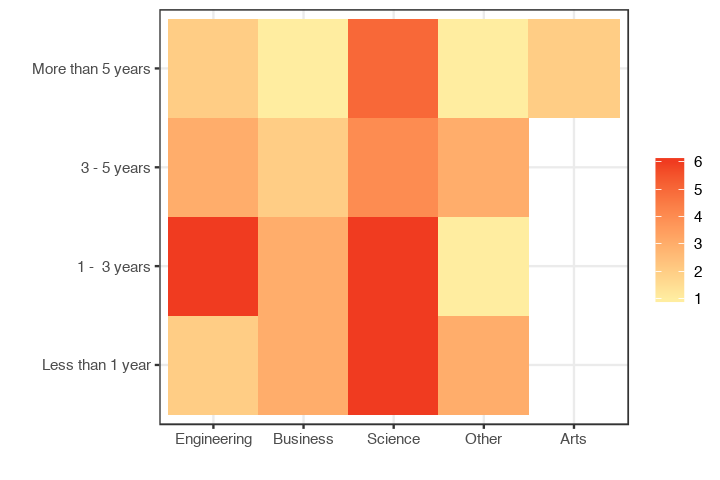

In [104]:
plot_heat(df_fact, x = Q2, y = Q1)

It seems that more people with a background in Science have less than 3 years full-time working experience than people in other fields before entering the MDS program.

#### Number of years of coding experience vs. number of years of full time work experience

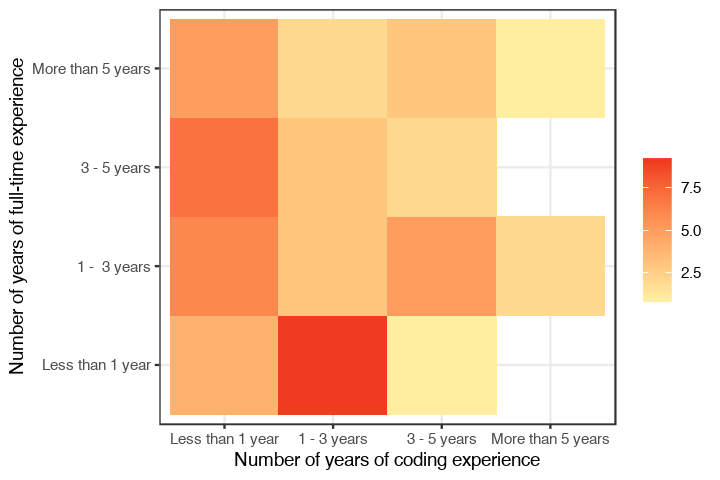

In [100]:
p <- plot_heat(df_fact, x = Q5, y = Q1)
p + labs(x  = "Number of years of coding experience", y = "Number of years of full-time experience")

More people with 1-3 years coding experience have less than 1 year full-time working experience before entering the program.